In [1]:
import pandas
import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':20, 'font.family':'FreeSans', 'xtick.labelsize':20, 'ytick.labelsize':20, 'figure.figsize':(12, 8)})

In [2]:
untargetted_data_file = '/home/adrian/projects/HUVECs/data/untargetted/AllBatches/ROSA_ACID_NEG_UT_NOMISNORM_AllBatches.csv'

In [3]:
df = pandas.read_csv(untargetted_data_file, sep=',')

In [4]:
df.head()

,Sample,Number,Treatment,Batch,Cell number,TIME,X59.01097,X61.017890000000001,X67.016220000000004,X74.021450000000002,...,X737.14193,X740.16098,X740.71343000000002,X740.73257999999998,X740.74688000000003,X743.16147000000001,X743.48454000000004,X745.12892999999997,X745.14395999999999,X745.16129000000001
0,EC_Rosa_1_650,29,100,1,390000.0,24,5.852441,5.932726,5.051917,6.345683,...,5.733799,6.246663,7.201546,7.119625,7.096909,6.742333,5.687035,5.426009,5.642669,5.644448
1,EC_Rosa_1_651,6,EGM,1,560000.0,4,5.462459,5.891913,5.674451,6.460181,...,5.427957,6.217484,6.905804,6.942619,6.920406,6.188310,5.390414,6.422549,6.334127,6.313065
2,EC_Rosa_1_652,15,100,1,205000.0,4,5.031187,6.234452,5.298766,6.377965,...,4.870114,5.607866,6.688953,6.825913,6.793644,5.682537,5.083870,4.992752,5.381865,5.369995
3,EC_Rosa_1_653,26,10,1,525000.0,24,5.221399,5.712806,4.806511,6.193561,...,5.410174,6.281541,6.345312,6.482471,6.455920,6.475335,5.546431,6.060435,6.212212,6.286286
4,EC_Rosa_1_654,20,EGM,1,830000.0,24,5.786133,6.009039,5.477244,6.049853,...,4.865940,5.866259,6.888398,7.034687,7.036220,6.034948,5.554022,5.841243,6.112518,6.127484


In [5]:
peak_names = df.columns.to_list()

In [6]:
peak_names

['Sample',
 'Number',
 'Treatment',
 'Batch',
 'Cell  number',
 'TIME',
 'X59.01097',
 'X61.017890000000001',
 'X67.016220000000004',
 'X74.021450000000002',
 'X77.052040000000005',
 'X77.052049999999994',
 'X78.956580000000002',
 'X78.956770000000006',
 'X79.955420000000004',
 'X80.962869999999995',
 'X80.962720000000004',
 'X82.951819999999998',
 'X84.006739999999994',
 'X84.043059999999997',
 'X84.949100000000001',
 'X85.027289999999994',
 'X85.027019999999993',
 'X85.027270000000001',
 'X86.991519999999994',
 'X87.006460000000004',
 'X88.037970000000001',
 'X88.037940000000006',
 'X88.038039999999995',
 'X88.03792',
 'X89.022130000000004',
 'X89.022099999999995',
 'X89.040549999999996',
 'X92.032160000000005',
 'X92.031949999999995',
 'X92.925600000000003',
 'X93.043189999999996',
 'X94.922759999999997',
 'X96.919939999999997',
 'X96.965789999999998',
 'X96.967179999999999',
 'X96.957989999999995',
 'X96.965829999999997',
 'X97.009529999999998',
 'X100.0742',
 'X102.02508',
 'X102.

In [7]:
# metabolite names
aspartate = 'X132.02816000000001'


In [8]:
treatments = ['EGM', '1', '10', '100']
timepoints = [0, 4, 24]

conditions = [('EGM', 0), ('EGM', 4), ('EGM', 24)]
for treatment in treatments[1:]:
    for timepoint in timepoints[1:]:
        condition = (treatment, timepoint)
        conditions.append(condition)
print(conditions)

[('EGM', 0), ('EGM', 4), ('EGM', 24), ('1', 4), ('1', 24), ('10', 4), ('10', 24), ('100', 4), ('100', 24)]


In [9]:
all_values = []
for condition in conditions:
    treatment = condition[0]; timepoint = condition[1]
    sub = df[(df['Treatment'] == treatment) & (df['TIME'] == timepoint)][aspartate]
        
    print('Concentration {}, time {}, shape: {}.'.format(treatment, timepoint, sub.shape))
    all_values.append(sub.values)

Concentration EGM, time 0, shape: (12,).
Concentration EGM, time 4, shape: (15,).
Concentration EGM, time 24, shape: (15,).
Concentration 1, time 4, shape: (14,).
Concentration 1, time 24, shape: (15,).
Concentration 10, time 4, shape: (15,).
Concentration 10, time 24, shape: (14,).
Concentration 100, time 4, shape: (15,).
Concentration 100, time 24, shape: (15,).


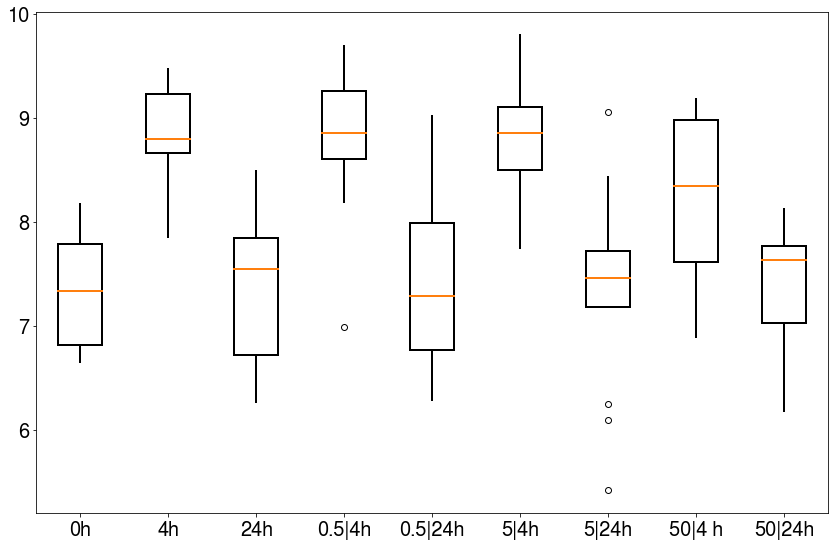

In [49]:
matplotlib.pyplot.boxplot(all_values, boxprops={'lw':2, 'facecolor':'white'}, medianprops={'lw':2}, whiskerprops={'lw':2}, showcaps=False, patch_artist=True)

matplotlib.pyplot.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9], ['0h', '4h', '24h', '0.5|4h', '0.5|24h', '5|4h', '5|24h', '50|4 h', '50|24h'])
matplotlib.pyplot.tight_layout()


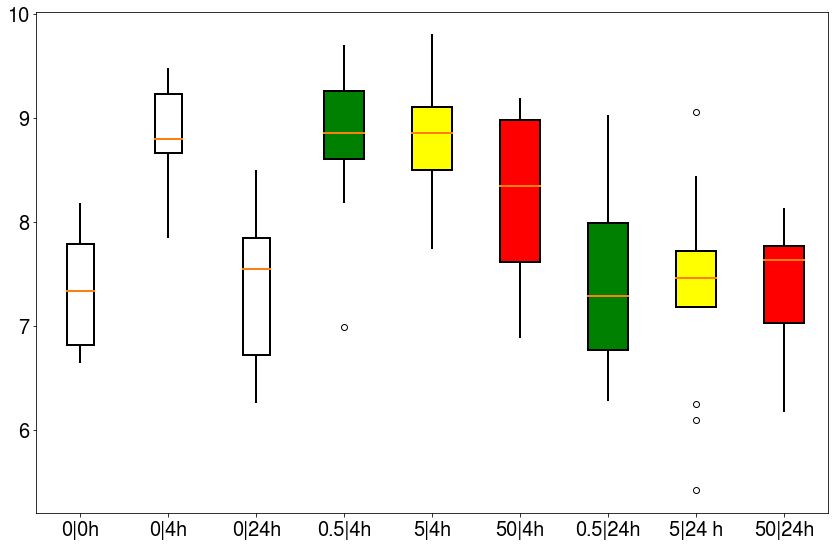

In [50]:
matplotlib.pyplot.boxplot(all_values[0:3], boxprops={'lw':2, 'facecolor':'white'}, medianprops={'lw':2}, whiskerprops={'lw':2}, showcaps=False, patch_artist=True, positions=[1, 2, 3])

matplotlib.pyplot.boxplot(all_values[3:5], boxprops={'lw':2, 'facecolor':'green'}, medianprops={'lw':2}, whiskerprops={'lw':2}, showcaps=False, patch_artist=True, positions=[4, 7])

matplotlib.pyplot.boxplot(all_values[5:7], boxprops={'lw':2, 'facecolor':'yellow'}, medianprops={'lw':2}, whiskerprops={'lw':2}, showcaps=False, patch_artist=True, positions=[5, 8])

matplotlib.pyplot.boxplot(all_values[7:9], boxprops={'lw':2, 'facecolor':'red'}, medianprops={'lw':2}, whiskerprops={'lw':2}, showcaps=False, patch_artist=True, positions=[6, 9])

matplotlib.pyplot.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9], ['0|0h', '0|4h', '0|24h', '0.5|4h', '5|4h', '50|4h', '0.5|24h', '5|24 h', '50|24h'])

matplotlib.pyplot.tight_layout()